# <code style="background:green;color:black">**Movies Industry Analysis Project**</code>

***

# <code style="background:yellow;color:black">Introduction</code>

- This is a data analysis portfolio project about movies industry. The dataset used for the analysis is downloaded from kaggle website(kaggle.com). In this project, I'm trying to focus on data correlation and how each feature affect the others. Also, I will provide this analysis with visualizations to make results clear.
<br> <br>
- Data is in tabular format(.csv file) of 15 columns and 7668 records. Those columns are: 
  - name 	
  - rating 	
  - genre 	
  - year 	
  - released 	
  - score 	
  - votes 	
  - director 	
  - writer 	
  - star 	
  - country 	
  - budget 	
  - gross 	
  - company 	
  - runtime
<br> <br>
- In the beginning, let's import some libraries which I will be using in the Analysis, then read the dataset file(.csv file) "movies_industry.csv" into python and store it in a dataframe named "movies" using pandas library.


In [100]:
# importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [101]:
# importing google drive for google colab
# from google.colab import drive
# drive.mount('/content/drive')


# <code style="background:yellow;color:black">EDA</code>

## <code style="background:cyan;color:black">Data Exploration</code>

In [102]:
movies = pd.read_csv('Data\movies_industry.csv')
movies.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [103]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [104]:
movies.shape


(7668, 15)

In [105]:
# dropping duplicates
movies.drop_duplicates(inplace = True)    
movies.shape


(7668, 15)

In [106]:
# nulls as percentage
movies.isnull().sum() * 100 / len(movies)


name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [107]:
# counting nulls
movies.isnull().sum().sort_values(ascending = False)


budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

## <code style="background:cyan;color:black">Data Wrangling</code>

### <code style="background:pink;color:black">Rows (Remove Nulls)</code>

In [108]:
# remove rows that contain nulls, based on columns that have very few null values
print(movies.shape)
movies.dropna(axis = 'rows', inplace = True)    
movies.shape


(7668, 15)


(5421, 15)

### <code style="background:pink;color:black">Columns</code>

#### <code style="background:dodgerblue;color:black">budget and gross</code>

In [109]:
# budget, gross nulls
len(movies.loc[np.logical_and(movies['budget'].isnull(), movies['gross'].isnull())])


0

In [110]:
# drop all budget nulls and all gross nulls
print(movies.shape)
movies.dropna(subset = ['budget', 'gross'] , inplace = True)
movies.shape


(5421, 15)


(5421, 15)

#### rating 

In [111]:
movies['rating'].value_counts()


rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64

In [112]:
movies = movies.fillna({'rating': 'Not Rated'})


In [113]:
def rating_clean(r):
    rating_unknown = ['Unrated', 'NC-17', 'TV-MA', 'Approved', 'X']
    if r in rating_unknown:
        return 'Not Rated'
    else:
        return r
        
movies['rating'] =  movies['rating'].apply(rating_clean)        
movies['rating'].value_counts()


rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      77
Name: count, dtype: int64

#### <code style="background:dodgerblue;color:black">company</code>

In [114]:
movies.company.value_counts()


company
Universal Pictures                     330
Columbia Pictures                      302
Warner Bros.                           298
Paramount Pictures                     279
Twentieth Century Fox                  209
                                      ... 
Cinépix Film Properties (CFP)            1
Intermedia Films                         1
Dollface                                 1
Calimari Productions                     1
Beijing Diqi Yinxiang Entertainment      1
Name: count, Length: 1475, dtype: int64

In [115]:
companies = pd.DataFrame(movies['company'].value_counts())
companies = companies[companies['count'] < 5]
companies


,count
company,
Capella International,4
Embassy Pictures,4
Heyday Films,4
Alive Films,4
Amercent Films,4
...,...
Cinépix Film Properties (CFP),1
Intermedia Films,1
Dollface,1


In [116]:
movies['company'] = movies['company'].apply(lambda x: 'Other' if x in list(companies.index) else x)
movies['company'].value_counts()


company
Other                   1832
Universal Pictures       330
Columbia Pictures        302
Warner Bros.             298
Paramount Pictures       279
                        ... 
American Zoetrope          5
Nelson Entertainment       5
Bold Films                 5
Avenue Pictures            5
Trimark Pictures           5
Name: count, Length: 126, dtype: int64

#### <code style="background:dodgerblue;color:black">director</code>

In [117]:
movies.director.value_counts()


director
Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Steven Soderbergh    23
Ridley Scott         23
                     ..
Takao Okawara         1
Mark Tarlov           1
Michael Corrente      1
Gary Halvorson        1
Hu Guan               1
Name: count, Length: 2063, dtype: int64

#### <code style="background:dodgerblue;color:black">writer</code>

In [118]:
movies.writer.value_counts()


writer
Woody Allen          32
Stephen King         29
John Hughes          20
Luc Besson           14
Joel Coen            13
                     ..
Gavin Scott           1
Philip LaZebnik       1
Gigi Levangie         1
Thomas Vinterberg     1
Hu Guan               1
Name: count, Length: 3205, dtype: int64

#### <code style="background:dodgerblue;color:black">star</code>

In [119]:
movies.star.value_counts()


star
Nicolas Cage       40
Tom Hanks          38
Robert De Niro     38
Bruce Willis       34
Tom Cruise         33
                   ..
Robin Shou          1
Mira Sorvino        1
Djimon Hounsou      1
Stephen Fry         1
Zhi-zhong Huang     1
Name: count, Length: 1845, dtype: int64

#### <code style="background:dodgerblue;color:black">country</code>

In [120]:
movies.country.value_counts()


country
United States                     4319
United Kingdom                     492
Canada                             111
France                             105
Germany                             82
Australia                           42
Japan                               28
China                               26
Hong Kong                           24
Ireland                             21
Italy                               19
Spain                               18
New Zealand                         18
South Korea                         13
Mexico                              11
Denmark                             10
India                                8
Czech Republic                       7
Sweden                               5
Switzerland                          4
Belgium                              4
Russia                               4
South Africa                         4
Argentina                            3
Norway                               3
Taiwan           

In [121]:
countries = pd.DataFrame(movies['country'].value_counts())
countries = countries[countries['count'] < 5]
countries


,count
country,
Switzerland,4
Belgium,4
Russia,4
South Africa,4
Argentina,3
Norway,3
Taiwan,3
West Germany,3
Iran,3


In [122]:
movies['country'] = movies['country'].apply(lambda x: 'Other' if x in list(countries.index) else x)
movies['country'].value_counts()


country
United States     4319
United Kingdom     492
Canada             111
France             105
Germany             82
Other               62
Australia           42
Japan               28
China               26
Hong Kong           24
Ireland             21
Italy               19
Spain               18
New Zealand         18
South Korea         13
Mexico              11
Denmark             10
India                8
Czech Republic       7
Sweden               5
Name: count, dtype: int64

#### <code style="background:dodgerblue;color:black">genre</code>

In [123]:
movies.genre.value_counts()

genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: count, dtype: int64

In [124]:
genres = pd.DataFrame(movies['genre'].value_counts())
genres = genres[genres['count'] < 10]
genres


,count
genre,
Thriller,7
Sci-Fi,6
Romance,5
Family,4
Western,2


In [125]:
movies['genre'] = movies['genre'].apply(lambda x: 'Other' if x in list(genres.index) else x)
movies['genre'].value_counts()


genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Other          24
Mystery        17
Name: count, dtype: int64

#### <code style="background:dodgerblue;color:black">released</code>

In [126]:
movies.released


0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5421, dtype: object

In [127]:
movies['released'] = movies['released'].apply(lambda x: x[0:x.find('(')].strip())
movies.head(1)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0


In [128]:
movies['released'] = pd.to_datetime(movies['released'], format = 'mixed')
movies.head(1)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0


In [129]:
movies['month'] = movies['released'].dt.month_name()
movies = movies.drop(columns = ['released'])
movies.head(1)


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June


# <code style="background:yellow;color:black">Final DataFrame</code>

In [130]:
movies = movies.reset_index().drop(columns = ['index'])
movies


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,January
5417,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,February
5418,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,January
5419,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,Other,100.0,February


In [131]:
# Export data to build full Dashboard
movies.to_excel('Data/movies.xlsx')


# <code style="background:yellow;color:black">Data Analysis</code>

## <code style="background:cyan;color:black">Data Correlation</code>

### <code style="background:pink;color:black">First Correlation Matrix (Numerical Data Only)</code>


In [132]:
categ_columns = []
for col in movies.columns:
    if movies[col].dtype == 'object':
        categ_columns.append(str(col))
        
df1 = movies.drop(columns = categ_columns)
df1.head()


,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0


In [133]:
corr_matrix_1 = df1.corr(method = 'pearson') 
corr_matrix_1                                # correlation value between budget and gross = 0.740362


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [134]:
corr_matrix_1.style.background_gradient(cmap = 'coolwarm').format(precision = 2)


,year,score,votes,budget,gross,runtime
year,1.00,0.06,0.21,0.33,0.27,0.08
score,0.06,1.00,0.47,0.07,0.22,0.41
votes,0.21,0.47,1.00,0.44,0.61,0.35
budget,0.33,0.07,0.44,1.00,0.74,0.32
gross,0.27,0.22,0.61,0.74,1.00,0.28
runtime,0.08,0.41,0.35,0.32,0.28,1.00


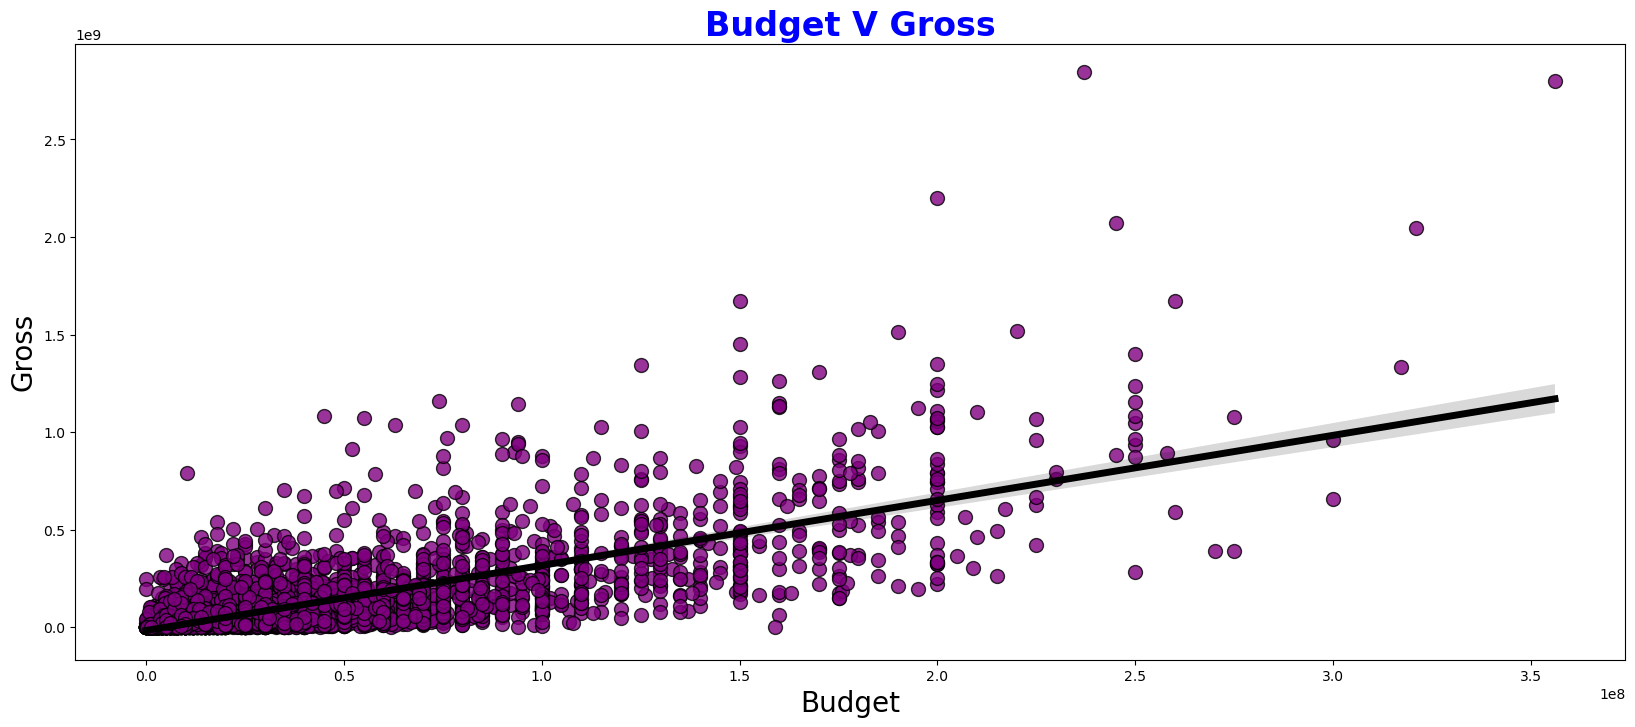

In [172]:
plt.figure(figsize = (20,8))
sns.regplot(
    x = 'budget', y = 'gross', data = df1, 
    scatter_kws = {'color': 'purple', 'edgecolor': 'black', 's': 100}, line_kws = {'color': 'k', 'lw': 5}
)
plt.xlabel('Budget', size = 20)
plt.ylabel('Gross', size = 20)
plt.title('Budget V Gross', size = 24, color = 'blue', weight = 'bold')
plt.show()


### <code style="background:pink;color:black">Second Correlation Matrix</code>

In [137]:
df2 = movies.copy()

for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype('category')
        df2[col] = df2[col].cat.codes
        
df2.head()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,4692,4,6,1980,8.4,927000.0,1795,2832,699,18,19000000.0,46998772.0,121,146.0,6
1,3929,4,1,1980,5.8,65000.0,1578,1158,214,19,4500000.0,58853106.0,32,104.0,5
2,3641,2,0,1980,8.7,1200000.0,757,1818,1157,19,18000000.0,538375067.0,75,124.0,6
3,204,2,4,1980,7.7,221000.0,889,1413,1474,19,3500000.0,83453539.0,89,88.0,5
4,732,4,4,1980,7.3,108000.0,719,351,271,19,6000000.0,39846344.0,87,98.0,5


In [138]:
corr_matrix_2 = round(df2.corr(method = 'pearson'), 2)
corr_matrix_2


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
name,1.00,-0.03,0.01,0.03,0.01,0.01,0.02,0.01,-0.01,-0.02,0.02,0.01,0.01,0.01,-0.01
rating,-0.03,1.00,0.14,0.02,0.07,0.01,0.01,-0.00,0.02,0.01,-0.20,-0.18,-0.09,0.14,0.02
genre,0.01,0.14,1.00,-0.07,0.05,-0.14,-0.01,0.02,0.00,-0.01,-0.38,-0.25,-0.06,-0.05,0.02
year,0.03,0.02,-0.07,1.00,0.06,0.21,-0.04,-0.03,-0.03,-0.06,0.33,0.27,-0.02,0.08,-0.01
score,0.01,0.07,0.05,0.06,1.00,0.47,0.01,0.01,0.01,-0.03,0.07,0.22,0.00,0.41,0.04
votes,0.01,0.01,-0.14,0.21,0.47,1.00,-0.01,-0.01,-0.02,0.04,0.44,0.61,0.06,0.35,0.03
director,0.02,0.01,-0.01,-0.04,0.01,-0.01,1.00,0.26,0.04,0.01,-0.01,-0.03,-0.01,0.02,0.00
writer,0.01,-0.00,0.02,-0.03,0.01,-0.01,0.26,1.00,0.02,0.02,-0.04,-0.04,0.00,-0.02,0.01
star,-0.01,0.02,0.00,-0.03,0.01,-0.02,0.04,0.02,1.00,-0.01,-0.02,-0.00,0.02,0.01,0.01
country,-0.02,0.01,-0.01,-0.06,-0.03,0.04,0.01,0.02,-0.01,1.00,0.05,0.06,0.02,-0.03,-0.01


In [157]:
corr_matrix_2 = df2.corr()
corr_pairs = corr_matrix_2.unstack()
corr_pairs


name   name       1.000000
       rating    -0.031950
       genre      0.008609
       year       0.025542
       score      0.014450
                    ...   
month  budget     0.017144
       gross      0.005874
       company   -0.005154
       runtime    0.006545
       month      1.000000
Length: 225, dtype: float64

In [140]:
corr_matrix_2.style.background_gradient(cmap = 'coolwarm').format(precision = 2)


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
name,1.00,-0.03,0.01,0.03,0.01,0.01,0.02,0.01,-0.01,-0.02,0.02,0.01,0.01,0.01,-0.01
rating,-0.03,1.00,0.14,0.02,0.07,0.01,0.01,-0.00,0.02,0.01,-0.20,-0.18,-0.09,0.14,0.02
genre,0.01,0.14,1.00,-0.07,0.05,-0.14,-0.01,0.02,0.00,-0.01,-0.38,-0.25,-0.06,-0.05,0.02
year,0.03,0.02,-0.07,1.00,0.06,0.21,-0.04,-0.03,-0.03,-0.06,0.33,0.27,-0.02,0.08,-0.01
score,0.01,0.07,0.05,0.06,1.00,0.47,0.01,0.01,0.01,-0.03,0.07,0.22,0.00,0.41,0.04
votes,0.01,0.01,-0.14,0.21,0.47,1.00,-0.01,-0.01,-0.02,0.04,0.44,0.61,0.06,0.35,0.03
director,0.02,0.01,-0.01,-0.04,0.01,-0.01,1.00,0.26,0.04,0.01,-0.01,-0.03,-0.01,0.02,0.00
writer,0.01,-0.00,0.02,-0.03,0.01,-0.01,0.26,1.00,0.02,0.02,-0.04,-0.04,0.00,-0.02,0.01
star,-0.01,0.02,0.00,-0.03,0.01,-0.02,0.04,0.02,1.00,-0.01,-0.02,-0.00,0.02,0.01,0.01
country,-0.02,0.01,-0.01,-0.06,-0.03,0.04,0.01,0.02,-0.01,1.00,0.05,0.06,0.02,-0.03,-0.01


## <code style="background:cyan;color:black">Gross per Month</code>

In [141]:
month_gross = pd.DataFrame(movies.groupby('month')['gross'].sum()).reset_index()
month_gross


,month,gross
0,April,3.055524e+10
1,August,3.469495e+10
2,December,6.965646e+10
3,February,3.096429e+10
4,January,2.812273e+10
5,July,6.776756e+10
6,June,7.140690e+10
7,March,3.938223e+10
8,May,6.618508e+10
9,November,6.601766e+10


In [142]:
month_list  = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_gross.index = pd.CategoricalIndex(month_gross['month'], categories = month_list, ordered = True)
month_gross = month_gross.sort_index().reset_index(drop = True)
month_gross


,month,gross
0,January,2.812273e+10
1,February,3.096429e+10
2,March,3.938223e+10
3,April,3.055524e+10
4,May,6.618508e+10
5,June,7.140690e+10
6,July,6.776756e+10
7,August,3.469495e+10
8,September,2.355544e+10
9,October,3.129941e+10


## <code style="background:cyan;color:black">Count of Movies per Month</code>

In [143]:
count_movies_per_month = pd.DataFrame(movies['month'].value_counts()).reset_index()
count_movies_per_month.index = pd.CategoricalIndex(count_movies_per_month['month'], categories = month_list, ordered = True)
count_movies_per_month = count_movies_per_month.sort_index().reset_index(drop = True)
count_movies_per_month


,month,count
0,January,449
1,February,418
2,March,449
3,April,422
4,May,390
5,June,427
6,July,446
7,August,515
8,September,437
9,October,522


In [144]:
month_gross_count_movies = pd.merge(month_gross, count_movies_per_month, how = 'inner', left_on = 'month', right_on = 'month')
month_gross_count_movies


,month,gross,count
0,January,2.812273e+10,449
1,February,3.096429e+10,418
2,March,3.938223e+10,449
3,April,3.055524e+10,422
4,May,6.618508e+10,390
5,June,7.140690e+10,427
6,July,6.776756e+10,446
7,August,3.469495e+10,515
8,September,2.355544e+10,437
9,October,3.129941e+10,522


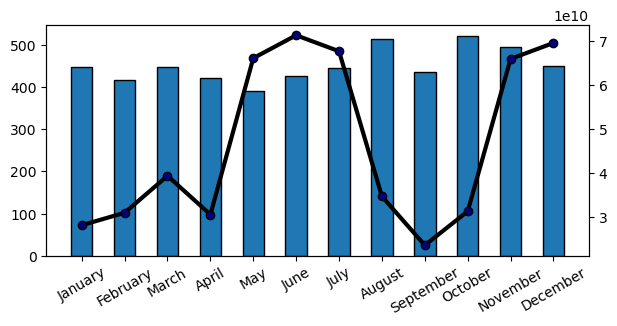

In [176]:
plt.figure(figsize = (7, 3))
plt.bar(month_gross_count_movies['month'], month_gross_count_movies['count'], width = 0.5, edgecolor = 'k')
plt.xticks(rotation = 30)
plt.twinx()
plt.plot(month_gross_count_movies['month'],  month_gross_count_movies['gross'], color = 'k', linewidth = 3, marker = 'o', mfc = 'navy', mec = 'k')
plt.show()


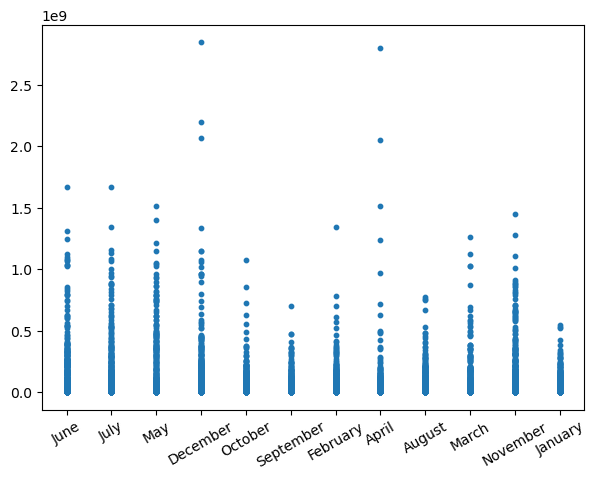

In [163]:
# highest movies of gross per month
plt.figure(figsize = (7, 5))
plt.scatter(movies['month'], movies['gross'], s = 10, )
plt.xticks(rotation = 30)
plt.show()


In [147]:
star_gross = pd.DataFrame(movies.groupby('star')['gross'].sum()).reset_index()
star_gross = star_gross.sort_values(by = 'gross', ascending = False)
star_gross = star_gross.head(30)
star_gross


,star,gross
1470,Robert Downey Jr.,1.185594e+10
1735,Tom Hanks,9.899945e+09
1732,Tom Cruise,9.440310e+09
1812,Will Smith,7.947279e+09
889,Johnny Depp,7.410125e+09
379,Daniel Radcliffe,6.971268e+09
1073,Leonardo DiCaprio,6.963368e+09
1785,Vin Diesel,6.036313e+09
472,Dwayne Johnson,5.711271e+09
220,Bruce Willis,5.318951e+09


In [148]:
star_movies_count = pd.DataFrame(movies['star'].value_counts()).reset_index()
star_movies_count


,star,count
0,Nicolas Cage,40
1,Tom Hanks,38
2,Robert De Niro,38
3,Bruce Willis,34
4,Tom Cruise,33
...,...,...
1840,Robin Shou,1
1841,Mira Sorvino,1
1842,Djimon Hounsou,1
1843,Stephen Fry,1


In [149]:
star_gross_count_movies = pd.merge(star_gross, star_movies_count, how = 'inner', left_on = 'star', right_on = 'star')
star_gross_count_movies = star_gross_count_movies.head(30).sort_values(by = 'gross', ascending = False)
star_gross_count_movies


,star,gross,count
0,Robert Downey Jr.,1.185594e+10,19
1,Tom Hanks,9.899945e+09,38
2,Tom Cruise,9.440310e+09,33
3,Will Smith,7.947279e+09,23
4,Johnny Depp,7.410125e+09,31
5,Daniel Radcliffe,6.971268e+09,10
6,Leonardo DiCaprio,6.963368e+09,20
7,Vin Diesel,6.036313e+09,15
8,Dwayne Johnson,5.711271e+09,22
9,Bruce Willis,5.318951e+09,34


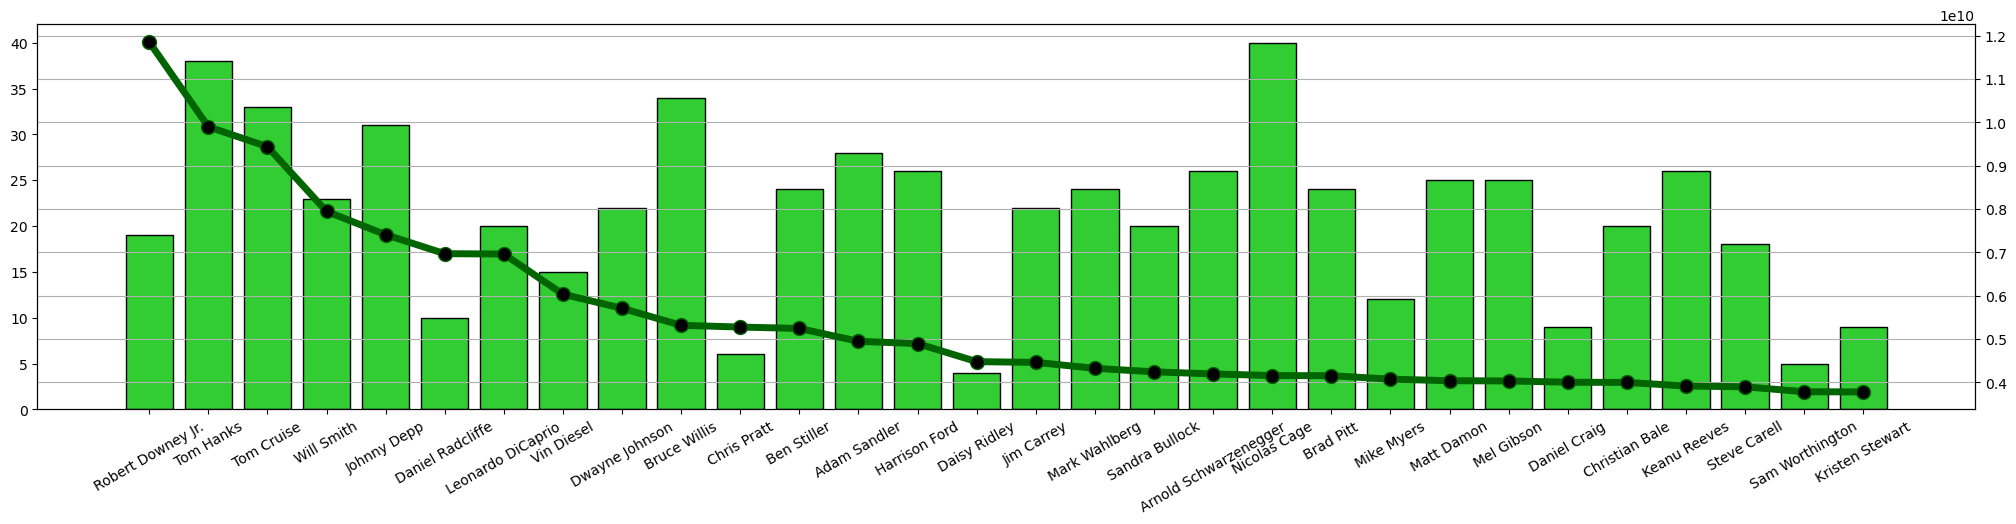

In [162]:
plt.figure(figsize = (25,5))
plt.bar(star_gross_count_movies['star'], star_gross_count_movies['count'], color = 'limegreen', edgecolor = 'k')
plt.xticks(rotation = 30)
plt.twinx()
plt.plot(star_gross_count_movies['star'], star_gross_count_movies['gross'], color = 'darkgreen', linewidth = 5, marker = 'o', ms = 10, mfc = 'k')
plt.grid()
plt.show()


In [336]:
actors = pd.DataFrame(movies['star'].value_counts())
actors


,count
star,
Nicolas Cage,40
Robert De Niro,38
Tom Hanks,38
Tom Cruise,34
Bruce Willis,34
...,...
Keisha Castle-Hughes,1
Everlyn Sampi,1
Amanda Donohoe,1


***

**End of Project**